In [213]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
data = pickle.load( open( "/content/drive/MyDrive/Colab Notebooks/data_simple.p", "rb" ) )
data = data.drop(columns=['patient_nbr'])
data.head()

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,admission_type_Elective,admission_type_Emergency,admission_type_NaN,admission_type_Newborn,admission_type_Trauma Center,admission_type_Urgent,metformin_bool,repaglinide_bool,nateglinide_bool,chlorpropamide_bool,glimepiride_bool,acetohexamide_bool,glipizide_bool,glyburide_bool,tolbutamide_bool,pioglitazone_bool,rosiglitazone_bool,acarbose_bool,miglitol_bool,troglitazone_bool,tolazamide_bool,insulin_bool,glyburide-metformin_bool,glipizide-metformin_bool,glimepiride-pioglitazone_bool,metformin-rosiglitazone_bool,metformin-pioglitazone_bool,age_label
0,1,6,25,1,1,41,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6,25,1,10,56,2,24,0,0,0,9,0,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
2,0,6,25,7,9,61,4,25,0,0,0,9,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6
3,0,6,25,7,11,68,0,25,0,0,0,9,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4
4,1,6,25,7,6,47,2,13,0,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [216]:
pd.set_option('display.max_columns', None)

In [217]:
data.dtypes

gender                           int64
admission_type_id                int64
discharge_disposition_id         int64
admission_source_id              int64
time_in_hospital                 int64
                                 ...  
glipizide-metformin_bool         int64
glimepiride-pioglitazone_bool    int64
metformin-rosiglitazone_bool     int64
metformin-pioglitazone_bool      int64
age_label                        int64
Length: 74, dtype: object

# Clustering

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

## Korrelationsmatrix

In [219]:
correlation_matrix = data.corr()

### Textform

In [220]:
numerical_data = data.select_dtypes(include='number')
correlation_matrix_numerical = numerical_data.corr()
for column in correlation_matrix_numerical.columns:
    for index, value in correlation_matrix_numerical[column].items():
        # Überprüfe, ob der Wert größer als 0.3 und ob es sich nicht um die Diagonale handelt
        if abs(value) > 0.3 and column != index:
            print(f"{column}, {index}: {value:.2f}")

admission_type_id, max_glu_serum: 0.36
admission_type_id, admission_type_Elective: 0.32
admission_type_id, admission_type_Emergency: -0.75
admission_type_id, admission_type_NaN: 0.64
admission_source_id, max_glu_serum: 0.42
admission_source_id, admission_type_Elective: -0.49
admission_source_id, admission_type_NaN: 0.35
time_in_hospital, num_lab_procedures: 0.32
time_in_hospital, num_medications: 0.47
num_lab_procedures, time_in_hospital: 0.32
num_procedures, num_medications: 0.39
num_medications, time_in_hospital: 0.47
num_medications, num_procedures: 0.39
number_diagnoses, diag_3_Missing: -0.32
max_glu_serum, admission_type_id: 0.36
max_glu_serum, admission_source_id: 0.42
change, diabetesMed: 0.51
change, metformin_bool: 0.32
change, insulin_bool: 0.51
diabetesMed, change: 0.51
diabetesMed, insulin_bool: 0.59
diag_1_Circulatory, diag_1_Other: -0.30
diag_1_Other, diag_1_Circulatory: -0.30
diag_2_Circulatory, diag_2_Other: -0.40
diag_2_Missing, diag_3_Missing: 0.39
diag_2_Other, diag_

###Abbildung von Top 10 Korrelationen

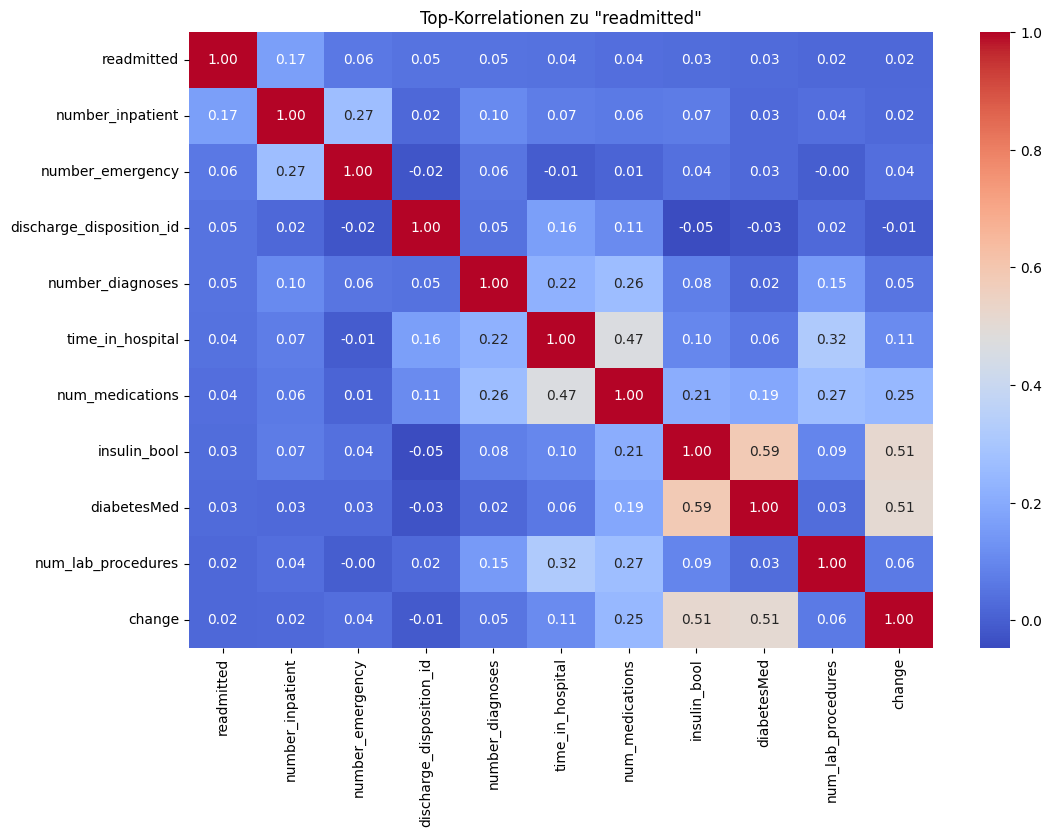

In [221]:
#Korrelationen mit der Zielgröße sortieren
correlation_with_target = correlation_matrix['readmitted'].sort_values(ascending=False)

#Die Top-N-Korrelationen anzeigen (zum Beispiel die Top 10)
top_correlation_features = correlation_with_target.head(11)  # 10 Features + Zielgröße

#Heatmap nur für die Top-Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(data[top_correlation_features.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top-Korrelationen zu "readmitted"')
plt.show()

### Subsample

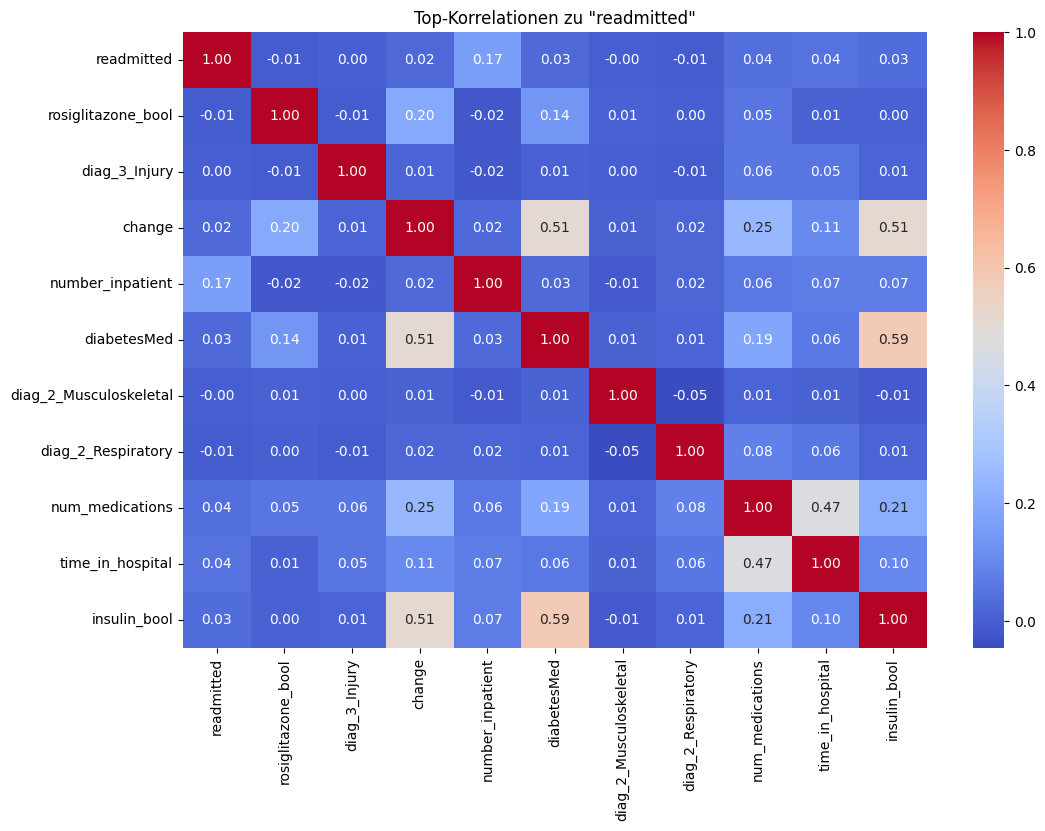

In [222]:
subset_data = data.sample(n=200, random_state=42)
correlation_matrix_sub = subset_data.corr()
#Korrelationen mit der Zielgröße sortieren
correlation_with_target = correlation_matrix_sub['readmitted'].sort_values(ascending=False)

#Die Top-N-Korrelationen anzeigen (zum Beispiel die Top 10)
top_correlation_features = correlation_with_target.head(11)  # 10 Features + Zielgröße

#Heatmap nur für die Top-Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(data[top_correlation_features.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top-Korrelationen zu "readmitted"')
plt.show()

## Quantifying information content of features

In [231]:
import numpy as np
all_cols = data.columns
cont_data = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"]
cat_data = [col for col in all_cols if col not in cont_data]

### Entropy

In [232]:
#Entropie für kategorische Daten
from scipy.stats import entropy
cat_feature_entropies=[]
for feature in cat_data:
    x=entropy(data[feature].value_counts(), base=2)/(len(data[feature].value_counts().index)-1)
    cat_feature_entropies.append(x)
    print(feature+' '+str(x))
cat_feature_entropies=np.array(cat_feature_entropies)



gender 0.9959029953940428
admission_type_id 0.26315029723450045
discharge_disposition_id 0.08374936843098263
admission_source_id 0.10626064332598234
max_glu_serum 0.1254885802031859
A1Cresult 0.3012737624620117
change 0.9958212576223874
diabetesMed 0.7779314516077056
readmitted 0.5046524430457503
diag_1_Circulatory 0.8802479423489113
diag_1_Diabetes 0.4232163443703143
diag_1_Digestive 0.4468244447371597
diag_1_Genitourinary 0.2876440314554825
diag_1_Injury 0.36039976474788077
diag_1_Musculoskeletal 0.28093999286040877
diag_1_Neoplasms 0.21282489081528497
diag_1_Other 0.6770237834849324
diag_1_Respiratory 0.588830980019794
diag_2_Circulatory 0.8969709158379265
diag_2_Diabetes 0.5455822088145946
diag_2_Digestive 0.24679494812902733
diag_2_Genitourinary 0.410253641728189
diag_2_Injury 0.1624615671933803
diag_2_Missing 0.03366743665322381
diag_2_Musculoskeletal 0.12622107125108695
diag_2_Neoplasms 0.16884012177298968
diag_2_Other 0.8280647143103375
diag_2_Respiratory 0.49102899795532134
di

### Standardabweichung

In [233]:
# Standardabweichung für kontinuierliche Daten
cont_feature_spread=[]
for feature in cont_data:
    standardardized=(data[feature]-data[feature].mean())/data[feature].std()
    x=abs(standardardized.max()-standardardized.min())
    cont_feature_spread.append(x)
    print(feature+'  '+str(x))
cont_feature_spread=np.array(cont_feature_spread)

time_in_hospital  4.354685248599819
num_lab_procedures  6.658523056912453
num_procedures  3.5172065593603574
num_medications  9.842563554429193
number_outpatient  33.138942781483564
number_emergency  81.67208310998453
number_inpatient  16.628277170643152
number_diagnoses  7.757467892400175


## Clustering algorithms

In [105]:
from sklearn.cluster import DBSCAN
import numpy as np

In [106]:
data.shape

(101742, 74)

### reducing dimensions due to high dimensional data

###Standardize the Data

In [203]:
from sklearn.preprocessing import StandardScaler

# Annahme: data ist dein DataFrame mit den vorbereiteten Daten
# Standardisierung der Daten
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

### PCA

In [204]:
from sklearn.decomposition import PCA

# Durchführung der PCA
pca = PCA()
pca.fit(scaled_data)




PCA()

### K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


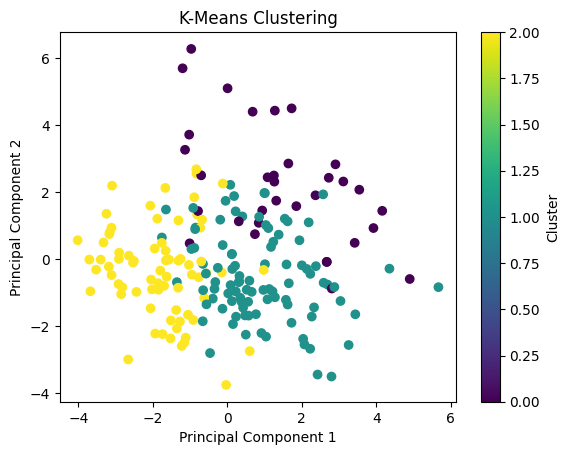

In [211]:
from sklearn.cluster import KMeans

# Annahme: pca ist das PCA-Modell, das bereits auf scaled_data angepasst wurde

# Transformiere die skalierten Daten mit der PCA
transformed_data = pca.transform(scaled_data)

# Anzahl der Cluster festlegen
num_clusters = 3

# K-Means-Modell erstellen und anpassen
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(transformed_data)

# Clusterzugehörigkeit für jeden Datenpunkt erhalten
cluster_labels = kmeans.labels_

# Darstellung der Cluster
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


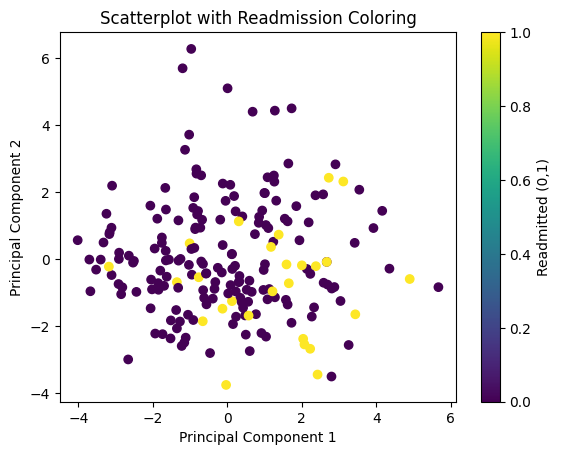

In [212]:
readmitted = subset_data['readmitted'].values

# Darstellung der Datenpunkte mit Farben basierend auf der Zielvariable 'readmitted'
scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=readmitted, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot with Readmission Coloring')

# Hinzufügen einer Farbkarte
plt.colorbar(scatter, label='Readmitted (0,1)')
plt.show()

analyse

### DBSCAN Clustering

###DBScan

Anzahl der Cluster: 1


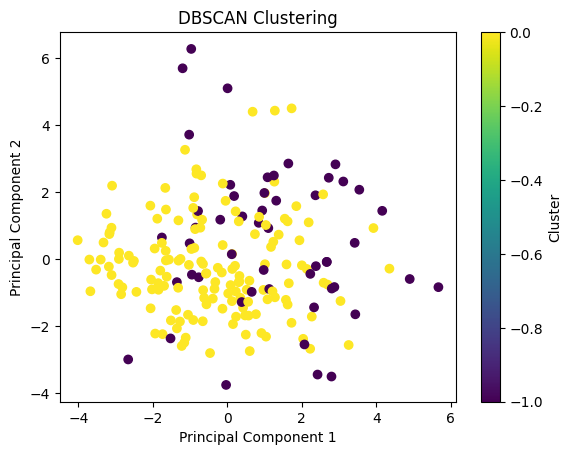

In [188]:
from sklearn.cluster import DBSCAN

# Annahme: pca ist das PCA-Modell, das bereits auf scaled_data angepasst wurde

# Transformiere die skalierten Daten mit der PCA
transformed_data = pca.transform(scaled_data)

dbscan = DBSCAN(eps=8, min_samples=20)  # Beispielwerte für eps und min_samples
cluster_labels = dbscan.fit_predict(transformed_data)

# Clusterzählen
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Anzahl der Cluster:", n_clusters)
# Darstellung der Cluster
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()